In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Fraud_check.csv")


In [ ]:
print("Dataset Preview:")
print(df.head())


Dataset Preview:
  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [ ]:
df['Risk_Status'] = np.where(df['Taxable.Income'] <= 30000, 'Risky', 'Good')
le = LabelEncoder()
for col in ['Undergrad', 'Marital.Status', 'Urban']:
    df[col] = le.fit_transform(df[col])
print("\nEncoded Data:")
print(df.head())



Encoded Data:
   Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban Risk_Status  
0               10      1        Good  
1               18      1        Good  
2               30      1        Good  
3               15      1        Good  
4               28      0        Good  


In [ ]:
X = df.drop('Risk_Status', axis=1)
y = df['Risk_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 1.0

Confusion Matrix:
 [[94  0]
 [ 0 26]]

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



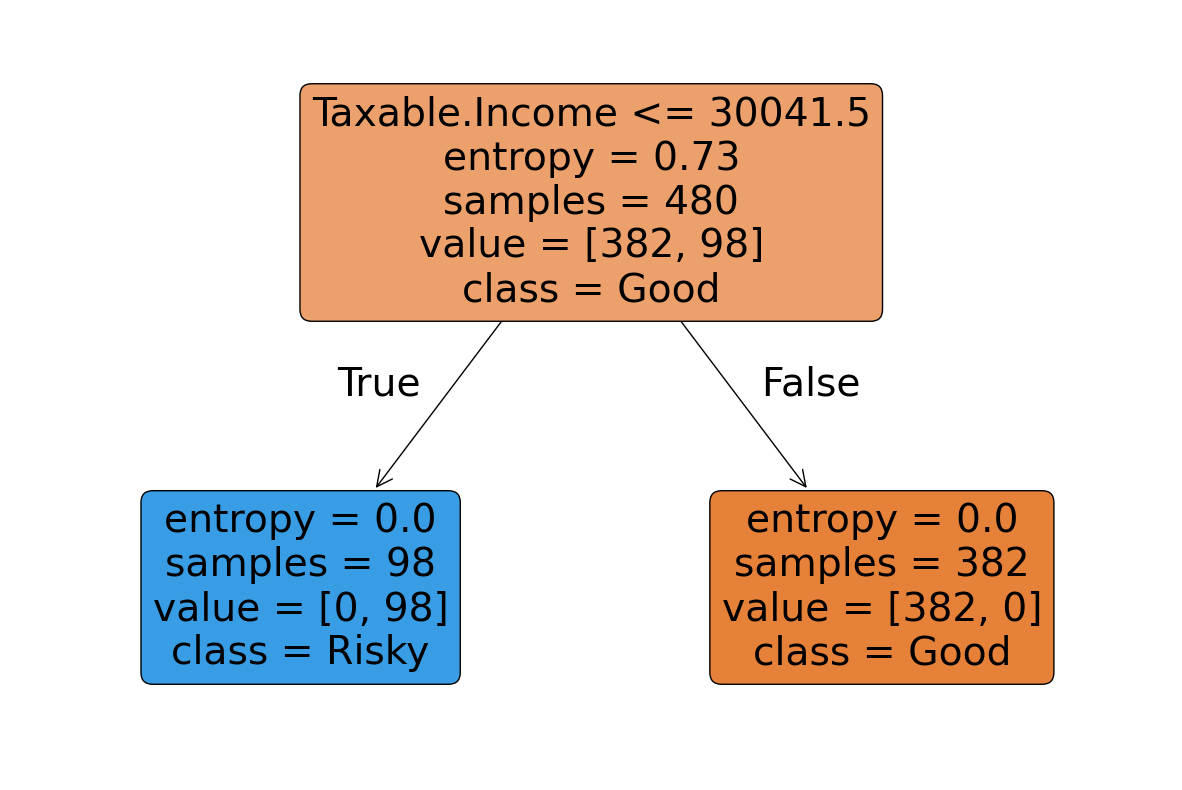

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['Good', 'Risky'],
          filled=True, rounded=True)
plt.show()